## HW-3 • Math 189 • Sp 2024
### Due Date: Fri, May 10

> NAME: $\color{red}{\text{    Chang Shu     }}$
> 
> PID: $\color{red}{\text{    A16846972     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://canvas.ucsd.edu/courses/55191/pages/expectations)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

# Question 1

For this question, we're going to examine maximum likelihood estimation and testing hypotheses about MLEs using likelihood-ratio tests. The data for this question is the `gamma.csv` file on Github [here](https://github.com/ucsd-math189/sp24) or on Canvas (`Files > data > gamma.csv`)

<br></br>

> a. Read `gamma.csv` as a dataframe and plot the histogram of the observations. What does the data look like?

(array([ 11.,  30.,  58.,  86.,  75., 102.,  84.,  95.,  76.,  58.,  67.,
         55.,  40.,  29.,  29.,  21.,  21.,  16.,  13.,   5.,   2.,   5.,
          9.,   5.,   1.,   3.,   1.,   2.,   0.,   1.]),
 array([ 0.18057297,  0.90489235,  1.62921173,  2.35353111,  3.07785049,
         3.80216987,  4.52648925,  5.25080863,  5.97512801,  6.69944739,
         7.42376677,  8.14808615,  8.87240553,  9.59672491, 10.32104429,
        11.04536367, 11.76968304, 12.49400242, 13.2183218 , 13.94264118,
        14.66696056, 15.39127994, 16.11559932, 16.8399187 , 17.56423808,
        18.28855746, 19.01287684, 19.73719622, 20.4615156 , 21.18583498,
        21.91015436]),
 <BarContainer object of 30 artists>)

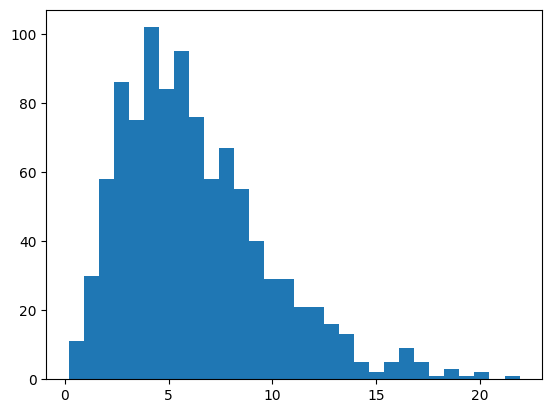

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
gamma_df = pd.read_csv('data/gamma.csv')
plt.hist(gamma_df['data'], bins=30)

The data looks like a little right-skewed.

---

> b. The data in `gamma.csv` follows a Gamma distribution with **unknown** shape parameter $\theta$ and **known** scale parameter $2$, i.e., $$X_1, X_2, \dots, X_n \sim \Gamma(\theta, 2)$$
> 
> On the histogram from **a.**, plot the PDF of $\Gamma(\theta, 2)$ for parameter(s) $\theta = 1, 2, 4$. Based on these preliminary plots, which of these three values of $\theta$ do you think is a more likely to have generated the data? 

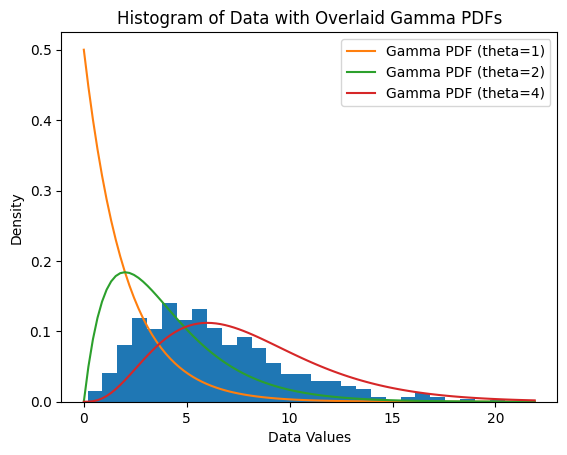

In [15]:
theta_values = [1, 2, 4]
x = np.linspace(0, gamma_df['data'].max(), 100)
plt.hist(gamma_df['data'], bins=30, density=True)
for theta in theta_values:
    dist = gamma(a=theta, scale=2)
    plt.plot(x, dist.pdf(x), label=f'Gamma PDF (theta={theta})')

plt.title('Histogram of Data with Overlaid Gamma PDFs')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.show()

I think it's more likely to generate the data when theta is four.

---

> c. write a function `log_likelihood(theta)` which takes in a candidate value of `theta` and outputs the log-likelihood $\ell(\theta)$.
> 

In [16]:
def log_likelihood(theta, data): # insert your code here
    log_likelihood = np.sum(gamma(a=theta, scale=2).logpdf(data))
    return log_likelihood 

log_likelihood(4, gamma_df['data'])

-2712.489917467078

---

> d. For a range of candidate `thetas` in `{0.01, 0.02, 0.03, ..., 4.98, 4.99, 5.0}` plot `log_likelihood(theta)` for each `theta` in `thetas`

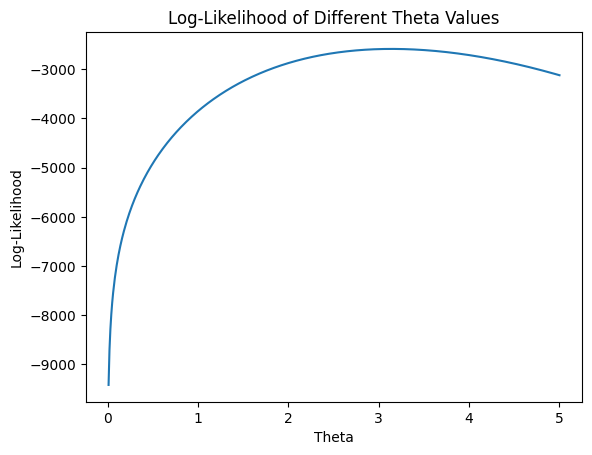

In [17]:
thetas = np.linspace(0.01, 5, 500)
ll_values = [log_likelihood(theta, gamma_df['data']) for theta in thetas]

plt.plot(thetas, ll_values)
plt.title('Log-Likelihood of Different Theta Values')
plt.xlabel('Theta')
plt.ylabel('Log-Likelihood')
plt.show()

---

> e. Minimize `log_likelihood(theta)` and compute the maximum likelihood estimator `mle_theta`. 
>
> You can use the values from part **d.** directly, or you can use any off-the-shelf optimizer to do this (e.g., `scipy.optimize` in Python, `optimize` in R, and `JuMP`, `Optim.jl` or `Optimization.jl` in Julia)

In [18]:
from scipy.optimize import minimize
nll_function = lambda x: -log_likelihood(x, gamma_df['data'])
lambda_init = np.random.rand()
res = minimize(
    nll_function, 
    lambda_init, 
    bounds=[(0.01, np.inf)]
)
mle_theta = res.x[0]
print(mle_theta)

3.140845209237363


---

> f. On the histogram from part **a.**, overlay the PDF of the $\Gamma(\hat\theta, 2)$ where $\hat\theta$ is the maximum likelihood estimator `mle_theta` you computed in the previous part. What do you observe in relation to your answer from part **b.**?

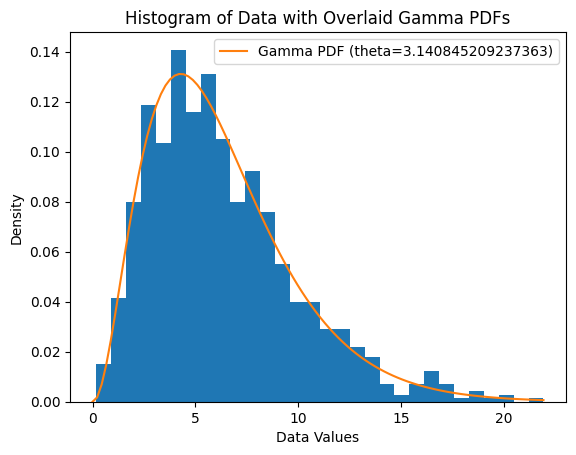

In [19]:
x = np.linspace(0, gamma_df['data'].max(), 100)
plt.hist(gamma_df['data'], bins=30, density=True)
dist = gamma(a=mle_theta, scale=2)
plt.plot(x, dist.pdf(x), label=f'Gamma PDF (theta={mle_theta})')

plt.title('Histogram of Data with Overlaid Gamma PDFs')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.show()

I think it's more likely to generate the data when theta is mle_theta.

---

> g. Given two hypotheses $$H_0: \theta = 3 \quad vs. \quad H_a: \theta > 3$$ compute the log-likelihood-ratio test statistic, $\Lambda$, for testing $H_0$ vs. $H_a$.

In [20]:
l_alternative = -minimize(
    nll_function, 
    lambda_init, 
    bounds=[(3, np.inf)]
).fun


l_null = -minimize(
    nll_function, 
    lambda_init, 
    bounds=[(3, 3)]
).fun

l_ratio = 2 * (l_alternative - l_null)
l_ratio

7.558627028415685

---

> h. Compute the $p$-value for this hypothesis test using your test statistic from part **g.** State your conclusions at the $\alpha=1\%$ significance level. 

In [21]:
import scipy.stats as stats
p_value = 1 - stats.chi2(1).cdf(l_ratio)
p_value

0.00597234746938291

In [22]:
alpha = 0.01
print(f'reject H0') if p_value < alpha else print(f'fail to reject H0')

reject H0


Since p_value is smaller than 0.01, we reject H0.

---
---
---

# Question 2

For this question, we'll explore some non-parametric statistical tests. 

> a. Create the vectors $u$ and $w$ from HW1-Q2 and plot their histograms here.

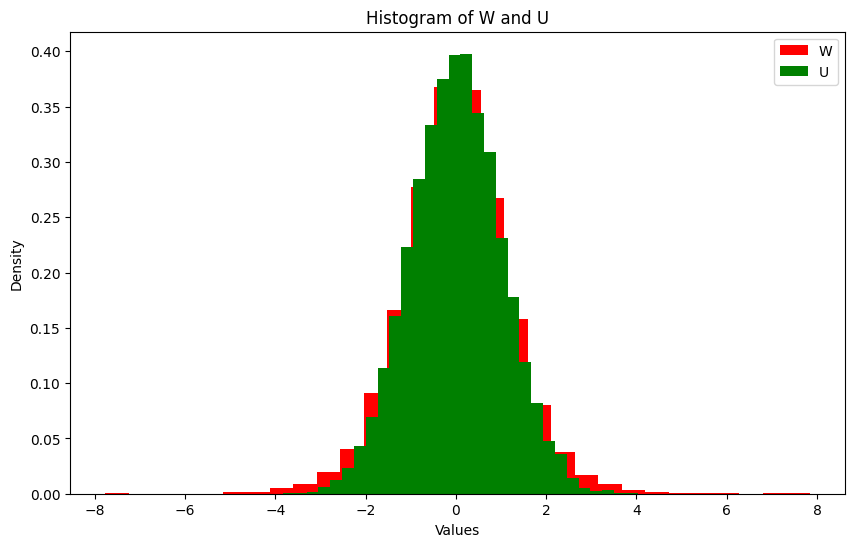

In [23]:
A = np.random.normal(0, 1, (20000, 7))

v = np.mean(A**2, axis=1)
u = np.random.normal(0, 1, 20000)
w = u / np.sqrt(v)

plt.figure(figsize=(10, 6))
plt.hist(w, bins=30, density=True, color='r')
plt.hist(u, bins=30, density=True, color='g')
plt.title('Histogram of W and U')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend(['W', 'U'])
plt.show()

---

> b. Plot the empirical CDFs (ECDFs) for $u$ and $w$, here as you did in HW1-Q2(i). 

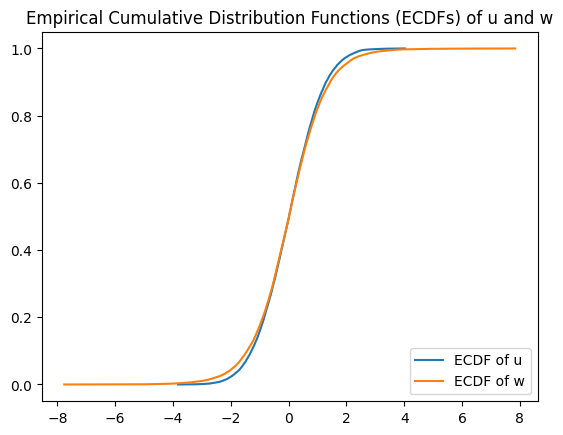

In [24]:
import scipy.stats as stats
u_sorted = np.sort(u)
Fu = np.arange(1, len(u) + 1) / len(u)
w_sorted = np.sort(w)
Fw = np.arange(1, len(w) + 1) / len(w)
plt.plot(u_sorted, Fu, label='ECDF of u')
plt.plot(w_sorted, Fw, label='ECDF of w')

plt.title('Empirical Cumulative Distribution Functions (ECDFs) of u and w')
plt.legend(loc='lower right')
plt.show()

---

> c. In words, describe the Kolmogorov-Smirnov test for testing whether $u$ and $w$ have the same distribution. In relation to the plot in part **b.**, explain what the KS test statistic is computing. 

In the plot, we can see that the ECDFs are close together across most of the range but diverge slightly at the tails. The KS test might yield a non-significant result, implying that it fails to distinguish the two distributions. Even if theoretically, the distributions are different, particularly in their tail behavior. KS test statistic is to compute the maximum vertical difference between two ECDFs.

---

> d. Fill in the following table for describing the Kolmogorov-Smirnov test for testing whether $u$ and $v$ have the same distribution. 
>
> (_Here $F_u$ and $F_w$ are the population CDFs for $u$ and $v$. You can use $\hat F_u$ and $\hat F_u$ to denote their ECDFs, respectively_)

| Anatomy of the hypothesis test |  Answer  |
|:------------------------------:|:--------:|
| Assumption                     | $$u_1, u_2, \dots, u_m \sim F_u, \quad\text{and}\quad w_1, w_2, \dots, w_n \sim F_w$$ |
| Null hypothesis                | $$H_0: F_u = F_w$$ |
| Alternate hypothesis           | $$H_\alpha: F_u \neq F_w$$ |
| Test statistic               | $$D_{m,n} = \sup_{x} \| \hat F_m(x) - \hat F_n(x) \|$$ |
| Rejection region shape         | $$(x_\alpha, \infty)$$ |

where $\hat F_m(x)$ and $\hat F_n(x)$ are the empirical distribution functions of $u_1, u_2, \dots, u_m$ and $w_1, w_2, \dots, w_n$, respectively.

---

> e. Perform the Kolmogorov-Smirnov test for $u$ and $w$ and state your conclusions at the $\alpha=5\%$ significance level. 

In [25]:
def decision(pvalue, alpha):
    if pvalue < alpha:
        print(f'reject H0: pvalue={pvalue} < {alpha}')  
    else: 
        print(f'fail to reject H0: pvalue={pvalue} ≥ {alpha}')
KS_result = stats.kstest(u, w)
alpha = 0.05
decision(KS_result.pvalue, alpha)

reject H0: pvalue=4.646250445235325e-06 < 0.05


---

> f. How does your answer from part **e.** compare with your intuition about what $u$ and $w$ should be? Explain.

$u$ and $w$ are two different distrbutions because The ECDF of $w$ indicates its distribution has heavier tails than the that of $u$. Thus, my answer is that they are two different distributions which is the same from the result of Kolmogorov-Smirnov test.

---
---
---